In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('house_price_data.csv')

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [2]:
print(df.isnull().sum())
df.dropna(inplace=True)
print(f"Number of duplicates: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Shape of the dataset after cleaning: {df.shape}")
X = df.drop('price', axis=1)  
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64
Number of duplicates: 0
Shape of the dataset after cleaning: (4600, 18)
Training set shape: X_train: (3680, 17), y_train: (3680,)
Testing set shape: X_test: (920, 17), y_test: (920,)


In [3]:

df.drop_duplicates(inplace=True)
df.drop(columns=['date', 'street', 'city', 'statezip', 'country'], inplace=True)
X = df.drop('price', axis=1) 
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training set shape: X_train: (3680, 12), y_train: (3680,)
Testing set shape: X_test: (920, 12), y_test: (920,)


In [4]:
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R^2 Score: {r2_train}")


Training Mean Squared Error: 64764831210.21875
Training R^2 Score: 0.544185359314763


Test Mean Squared Error: 986921767056.1592
Test R^2 Score: 0.03228385663274347


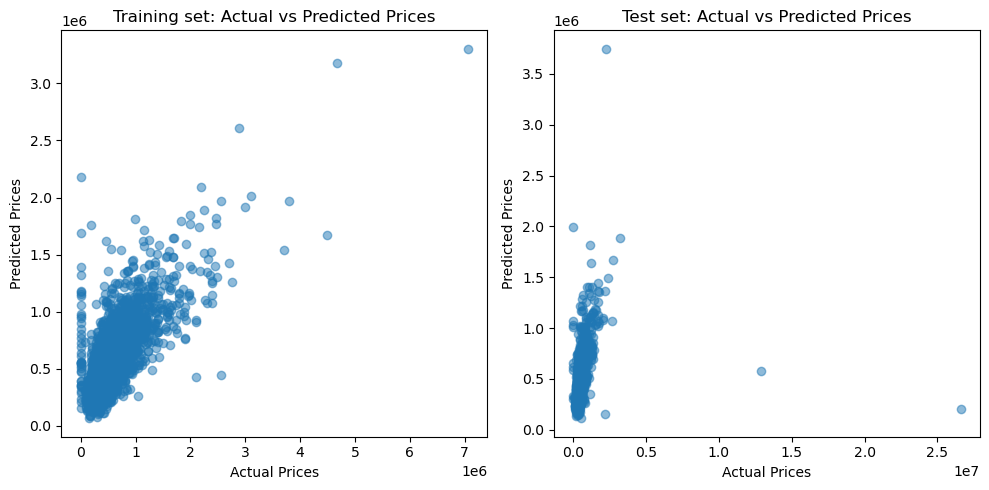

In [5]:

y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R^2 Score: {r2_test}")
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Training set: Actual vs Predicted Prices")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Test set: Actual vs Predicted Prices")

plt.tight_layout()
plt.show()


# Decision Tree

Decision Tree - Training Mean Squared Error: 517934.7826086957
Decision Tree - Training R^2 Score: 0.9999963547769303
Decision Tree - Test Mean Squared Error: 1052121827350.4335
Decision Tree - Test R^2 Score: -0.03164740215739448


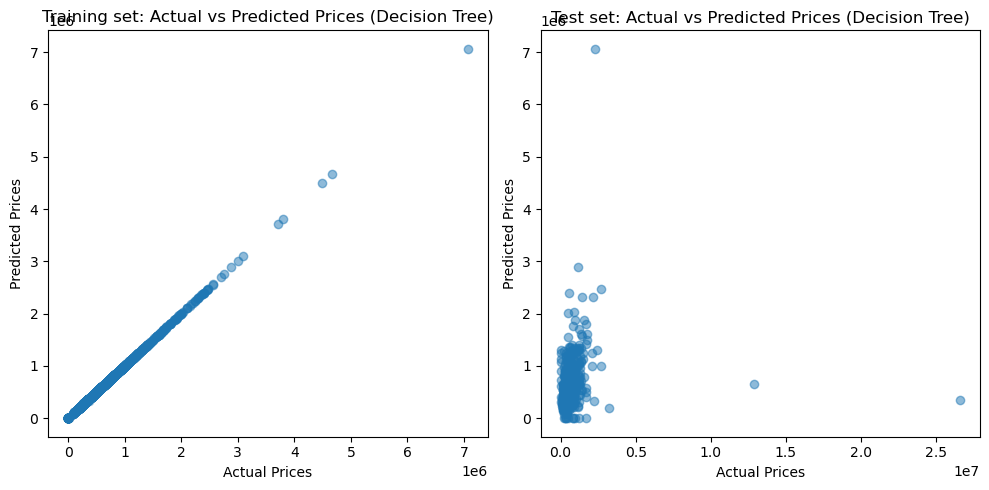

In [6]:

from sklearn.tree import DecisionTreeRegressor

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeRegressor(random_state=42)

dt_model.fit(X_train, y_train)

y_train_pred_dt = dt_model.predict(X_train)

mse_train_dt = mean_squared_error(y_train, y_train_pred_dt)
r2_train_dt = r2_score(y_train, y_train_pred_dt)

y_test_pred_dt = dt_model.predict(X_test)

mse_test_dt = mean_squared_error(y_test, y_test_pred_dt)
r2_test_dt = r2_score(y_test, y_test_pred_dt)

print(f"Decision Tree - Training Mean Squared Error: {mse_train_dt}")
print(f"Decision Tree - Training R^2 Score: {r2_train_dt}")
print(f"Decision Tree - Test Mean Squared Error: {mse_test_dt}")
print(f"Decision Tree - Test R^2 Score: {r2_test_dt}")

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_dt, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Training set: Actual vs Predicted Prices (Decision Tree)")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_dt, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Test set: Actual vs Predicted Prices (Decision Tree)")

plt.tight_layout()
plt.show()


# 

Random Forest - Training Mean Squared Error: 10561634840.127016
Random Forest - Training R^2 Score: 0.925667253357381
Random Forest - Test Mean Squared Error: 991775851992.8134
Random Forest - Test R^2 Score: 0.027524232809177818


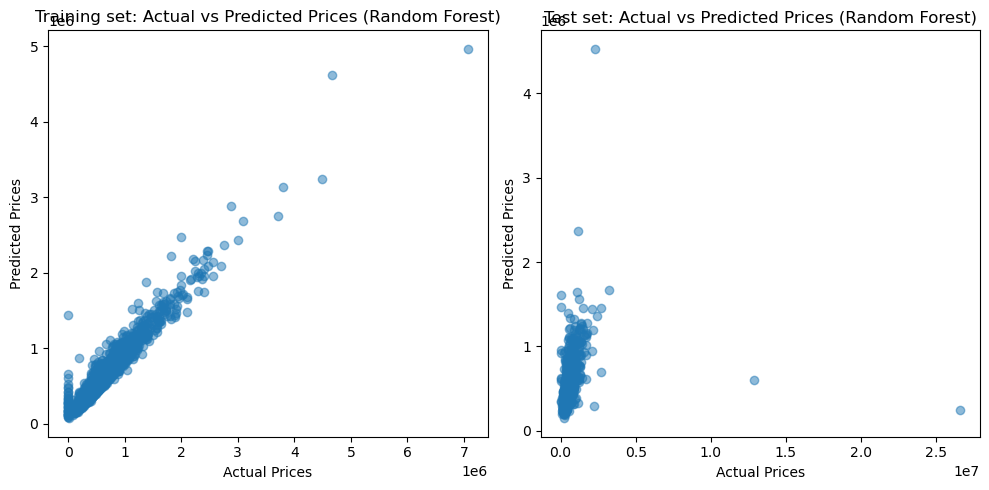

In [7]:

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_train_pred_rf = rf_model.predict(X_train)

mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

y_test_pred_rf = rf_model.predict(X_test)

mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print(f"Random Forest - Training Mean Squared Error: {mse_train_rf}")
print(f"Random Forest - Training R^2 Score: {r2_train_rf}")
print(f"Random Forest - Test Mean Squared Error: {mse_test_rf}")
print(f"Random Forest - Test R^2 Score: {r2_test_rf}")

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_rf, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Training set: Actual vs Predicted Prices (Random Forest)")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_rf, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Test set: Actual vs Predicted Prices (Random Forest)")

plt.tight_layout()
plt.show()
